In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,classification_report,r2_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
ds=pd.read_csv(r"C:\Users\HP\Desktop\INTERNSHIP 5 MARCH\ml project\exam  marks predition 10th ml project\results.csv")
print(ds)
print(ds.head(4))
print(ds.tail(4))
print(ds.shape)
print(ds.info)
print(ds.describe)

       id  Total  Results  Div
0       1    245        0    3
1       2    362        1    1
2       3    352        0    2
3       4    377        1    1
4       5    255        1    3
..    ...    ...      ...  ...
995   996    296        0    2
996   997    335        1    2
997   998    265        0    3
998   999    314        0    2
999  1000    424        1    1

[1000 rows x 4 columns]
   id  Total  Results  Div
0   1    245        0    3
1   2    362        1    1
2   3    352        0    2
3   4    377        1    1
       id  Total  Results  Div
996   997    335        1    2
997   998    265        0    3
998   999    314        0    2
999  1000    424        1    1
(1000, 4)
<bound method DataFrame.info of        id  Total  Results  Div
0       1    245        0    3
1       2    362        1    1
2       3    352        0    2
3       4    377        1    1
4       5    255        1    3
..    ...    ...      ...  ...
995   996    296        0    2
996   997    335       

In [2]:
print(ds.isnull().sum())

id         0
Total      0
Results    0
Div        0
dtype: int64


<Figure size 1080x864 with 0 Axes>

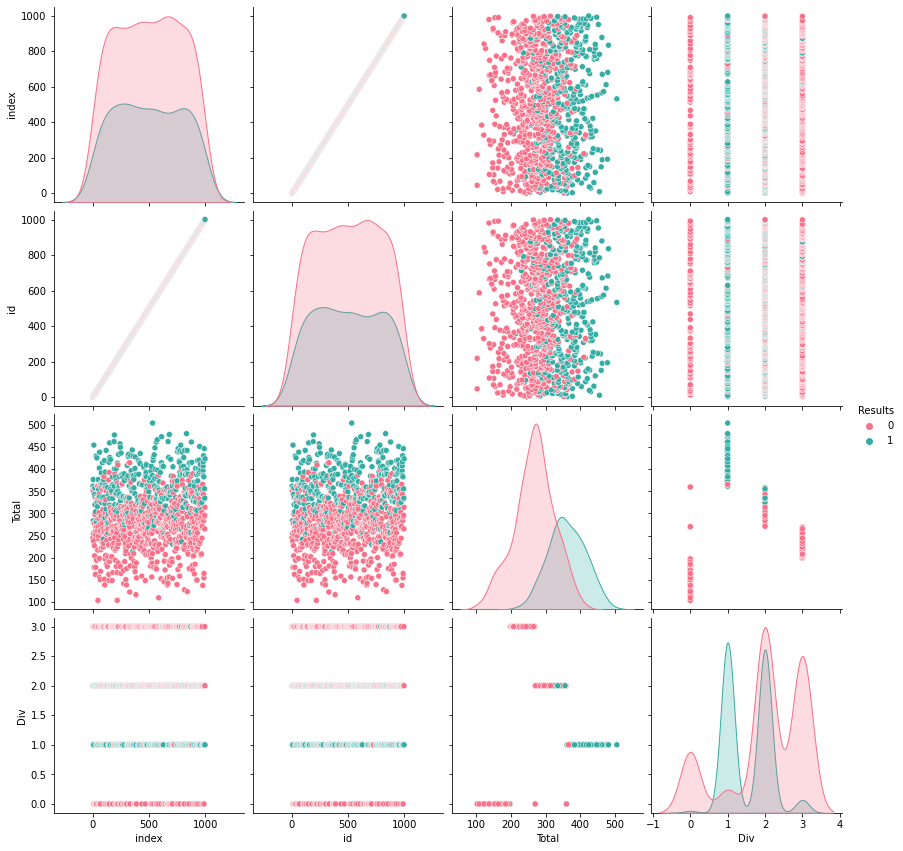

In [3]:
plt.figure(figsize=(15,12))
sns.pairplot(ds.reset_index(),palette="husl",hue="Results",height=3)
plt.show()

C:\ProgramData\Anaconda3\anaconda file\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


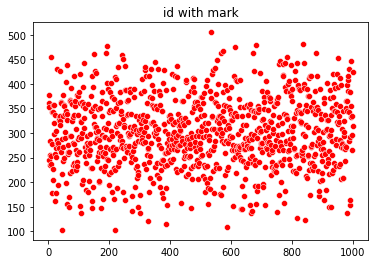

In [5]:
s=ds.iloc[:,0].values
a=ds.iloc[:,1].values

sns.scatterplot(s, a, color="red")
plt.title("id with mark")
plt.show()

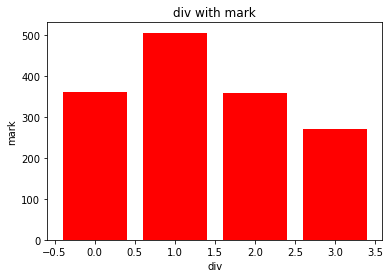

In [12]:
s=ds.iloc[:,-1].values
a=ds.iloc[:,1].values

plt.bar(s, a, color="red")
plt.title("div with mark")
plt.xlabel("div")
plt.ylabel("mark")
plt.show()

In [13]:
#find the x and y


y=ds.iloc[:,-2].values
x=ds.drop("Results",axis="columns")
print(y)
print(x)

[0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0
 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0
 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0
 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0
 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1
 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0
 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0
 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1
 0 0 0 0 0 0 1 0 0 1 1 0 

In [28]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [40]:
#feature scalling


sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
print(x_test)
print(x_train)

[[ 0.02330824  0.88107694 -0.92418744]
 [ 1.09860766  0.6045088   0.16952551]
 [-0.16685725  1.50335525 -0.92418744]
 [-0.45729182 -0.80598869  1.26323846]
 [-0.89294368  2.20860399 -0.92418744]
 [ 1.48239619 -1.09638523  1.26323846]
 [-0.82379259  0.03754412  0.16952551]
 [ 1.07094722  1.77992338 -0.92418744]
 [-0.63016954  1.87672223 -0.92418744]
 [-1.56025168 -0.76450347  1.26323846]
 [-0.18760258  0.24497023  0.16952551]
 [-1.23869912 -1.88460442 -2.0179004 ]
 [ 1.61724082  0.64599402  0.16952551]
 [-0.53681557  0.03754412  0.16952551]
 [ 1.62761348  0.36942589  0.16952551]
 [-1.26981711 -0.58473418  1.26323846]
 [-1.37008618 -2.0367169  -2.0179004 ]
 [-1.70892651 -0.86130232  1.26323846]
 [ 0.3448608   1.30975755 -0.92418744]
 [-0.01472486 -0.4187933   1.26323846]
 [ 0.69753135 -0.25285242  0.16952551]
 [-0.09770617 -1.26232612  1.26323846]
 [ 0.33794569  0.3970827   0.16952551]
 [ 0.00602047  1.04701782 -0.92418744]
 [-0.23255079  0.25879863  0.16952551]
 [-1.31822287 -0.37730808

In [50]:
#model train
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [51]:
#prediction

pre=model.predict(x_test)
print(pre)

[ 0.68115081  0.5039154   0.8650708   0.03094357  1.08027019 -0.07938083
  0.36407749  0.92931363  0.98004421  0.05763351  0.41612605 -0.02600384
  0.50914546  0.36027968  0.42838447  0.10619537 -0.06860813  0.03138275
  0.8018622   0.13795992  0.25928964 -0.10684426  0.45351408  0.72975383
  0.42075207  0.24968511  0.45577892  0.01011509  0.40958284  0.53632492
  0.03157231  0.26661991 -0.0547911   0.02114704  0.2527692   0.08361893
 -0.02431715  0.25438908  0.13118794  0.8616894  -0.01630491  0.5379448
  0.14444358  0.33516364  0.05154327  0.57944174  0.3797127   0.70650461
  0.07945967  0.31038191  0.84909712  0.50350796  0.4113262   0.47927509
  0.4418551   0.14386713  0.35572701  0.07045192  0.46267001  0.36890953
  0.32573776  0.53851665  0.24511864  0.10288272  0.77961066  0.50015875
  0.25808617 -0.19793535  0.28740724  0.60506548 -0.08822855 -0.03364692
  0.26022754  0.23520783 -0.06987724  0.12946275  0.85282617  0.81515923
  0.04194069  0.03471401  0.79749233 -0.0224501   0.

In [ ]:
#new house
Total=int(input('enter ur mark under 500:-'))
Div=int(input('enter ur Div 0,1,2,3 '))
id=int(input('enter ur id'))
name=[[id,Total,Div]]
result=model.predict(sc.transform(name))
print(result)
if result==1.0:
    print("pass student")
else:
    print("not pass")

In [26]:
#output

from sklearn.metrics import accuracy_score,classification_report,r2_score,confusion_matrix



print(r2_score(y_test,pre)*100)

32.44539045404572
